# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Dataset

In [2]:
data = pd.read_csv('trainTitanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Statistical Summary 

In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Null data and Data Information

#### Data Info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Data Null

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Exploratory Data Analysis

## Relationship Between Variables

### Survived -> Target Variable

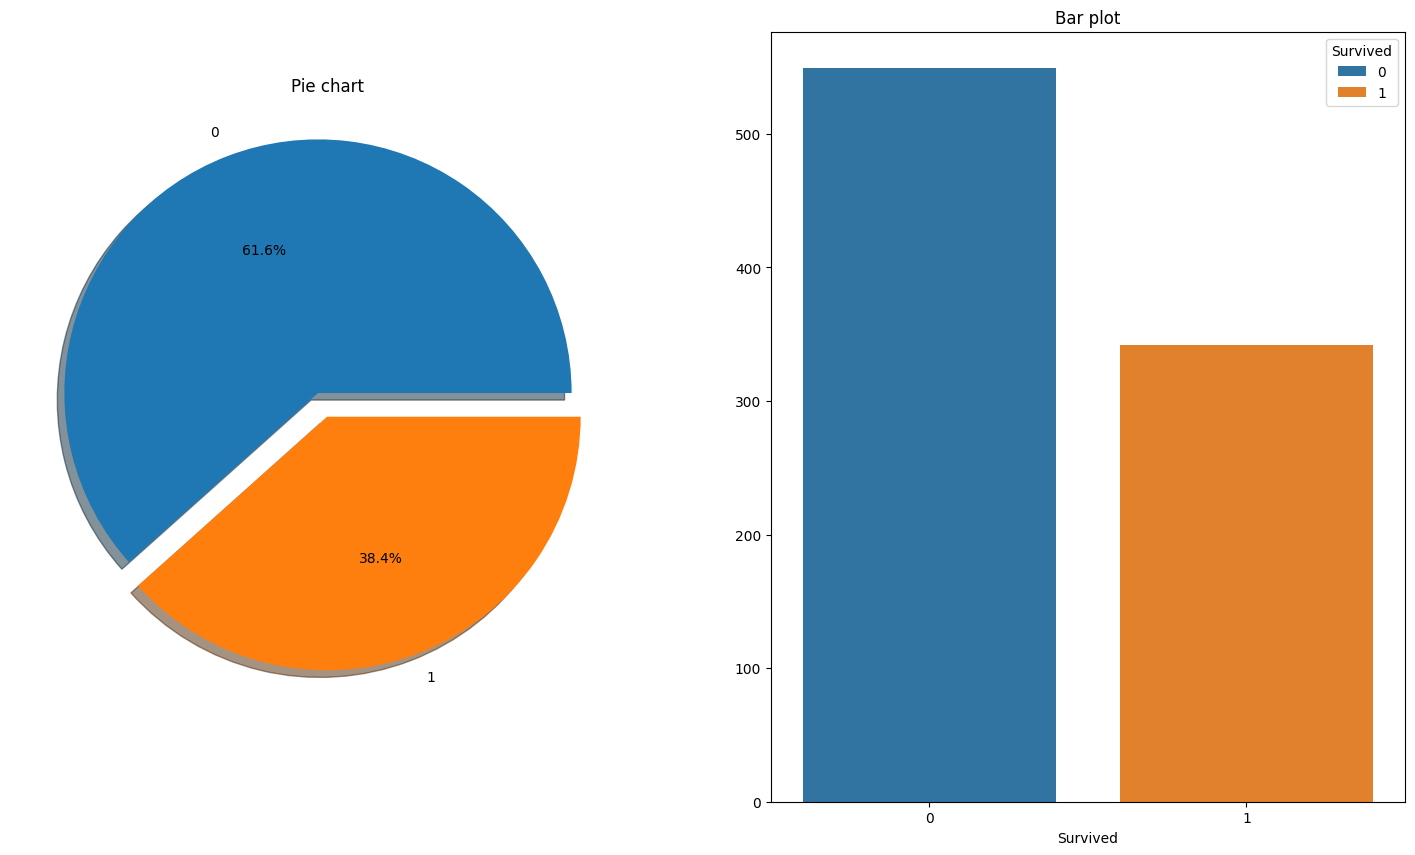

In [6]:
fig, ax = plt.subplots(1, 2, figsize = (18, 10))
data['Survived'].value_counts().plot(kind = 'pie', ax = ax[0], autopct = '%1.1f%%', explode = [0.1, 0], shadow = True)
ax[0].set_ylabel('')
sns.countplot(data = data, x = 'Survived', hue = 'Survived')
ax[0].set_title('Pie chart')
plt.title('Bar plot')
ax[1].set_ylabel('')
plt.show()

### PassangerID

In [7]:
data['PassengerId'].value_counts()

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64

Karena ID hanya membedakan satu row dengan yang lainnya, maka kolom ini bisa didrop karena tidak memiliki hubungan yang signifikan

In [8]:
data.drop(columns = ['PassengerId'], inplace= True)

### Pclass

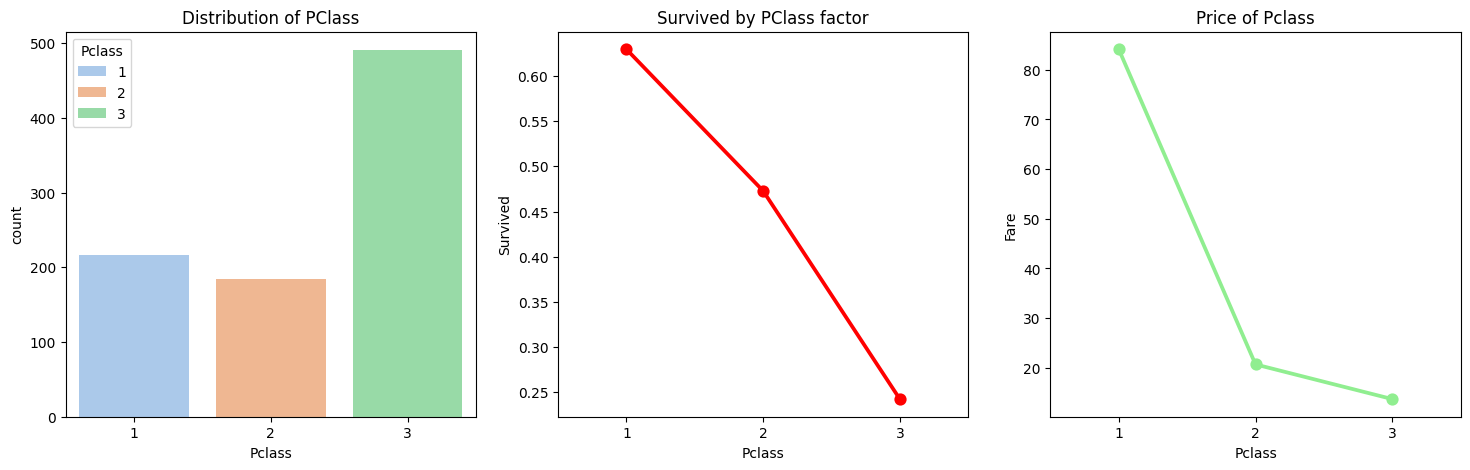

In [9]:
fig, ax = plt.subplots(1, 3, figsize = (18, 5))
sns.countplot(data = data, x = 'Pclass', hue = 'Pclass', ax = ax[0], palette='pastel')
ax[0].set_title('Distribution of PClass')
sns.pointplot(data = data, x = 'Pclass', y = 'Survived', ax = ax[1], color = 'red', ci = False)
ax[1].set_title('Survived by PClass factor')
sns.pointplot(data = data, x = 'Pclass', y = 'Fare', color = 'lightgreen', ci = False)
ax[2].set_title('Price of Pclass')
plt.show()

Dari data berikut, kita bisa melihat bahwa PClass memiliki rank / tingkatan berdasarkan harga -> 1, 2, dan 3 menempati paling bawah, dimana pada PClass 3 memiliki jumlah oprang paling banyak dan disaat bersamaan memiliki tingkat survival yang rendah

### Name & Sex

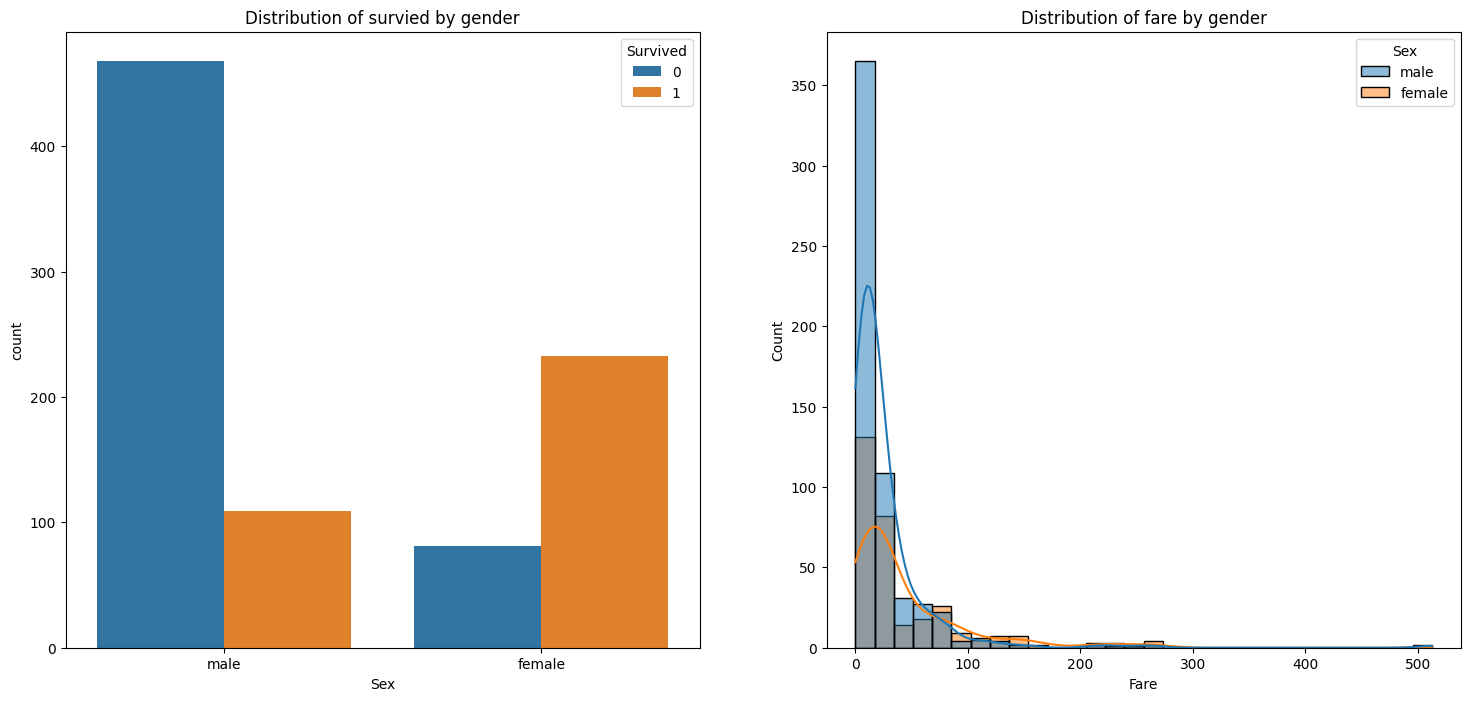

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.countplot(data = data, x = 'Sex', hue = 'Survived', ax = ax[0])
ax[0].set_title('Distribution of survied by gender')
sns.histplot(data = data, x = 'Fare', hue = 'Sex', bins = 30, kde = True)
ax[1].set_title('Distribution of fare by gender')
plt.show()

#### Sex

In [11]:
data['Fare'].groupby(data['Pclass']).mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

Dari sini kita bisa melihat bahwa female memiliki count survival yang lebih tinggi, dimana dalam distribusinya sendiri female memiliki distribusi yang tinggi berdasarkan graph sebelah kanan, memiliki rate yng lebih tinggi daripada male sehingga memiliki persentas elebih besar berada pada Pclass 1, dimana Pclass 1 sendiri memiliki rate survival yang lebih tinggi

In [12]:
data['Age'].groupby(data['Sex']).mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

#### Name

Karena name tidak memiliki fungsi yang signifikan, kita perlu mengetahui 'salutan' dari sebuah nama untuk mengetahui informasi lebih lanjut

In [13]:
data['Initial'] = 0
pattern = r'(\w+)\.\s'
data['Initial'] = data['Name'].str.extract(pattern)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [14]:
pd.crosstab(data['Initial'], data['Sex']).T.style.background_gradient(cmap = 'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [15]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

#Karena kita tidak lagi membutuhkan nama, maka nama bisa didrop
data.drop(columns = ['Name', 'Ticket'], inplace = True)

In [16]:
pd.crosstab(data['Initial'], data['Sex']).T.style.background_gradient(cmap = 'summer_r')

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


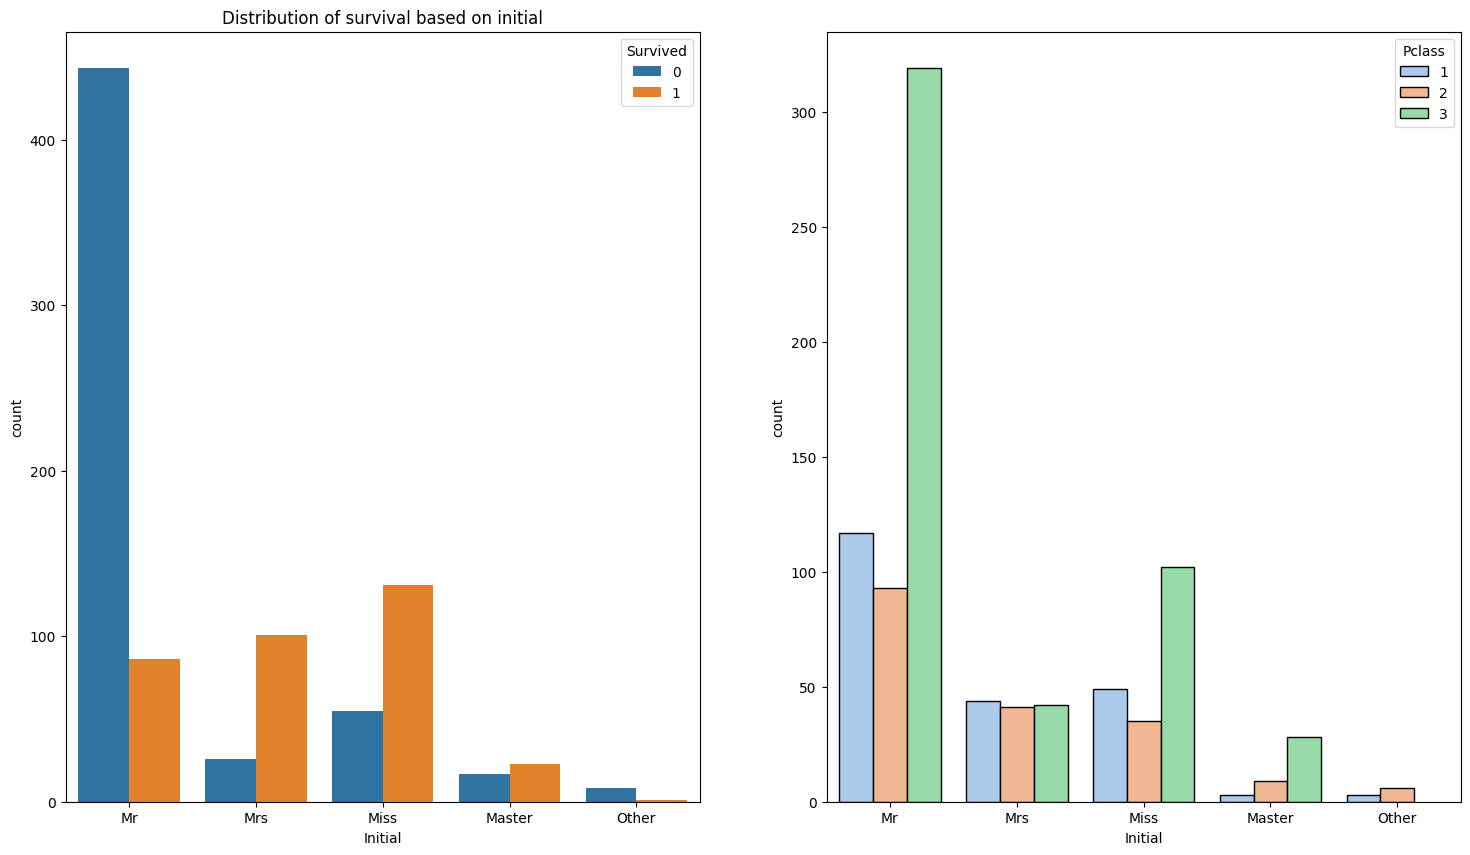

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (18, 10))
sns.countplot(data = data, x  = 'Initial', hue = 'Survived', ax = ax[0])
ax[0].set_title('Distribution of survival based on initial')
sns.countplot(data = data, x = 'Initial', hue = 'Pclass', palette='pastel', edgecolor = 'black')
plt.show()

Dari sini kita bisa lihat bahwa orang yang memiliki salutation perempuan, miss, mrs dan juga anak - anak, master memiliki persentase survival lebih tinggi walau banyak yang berada pada PClass 3

### Age

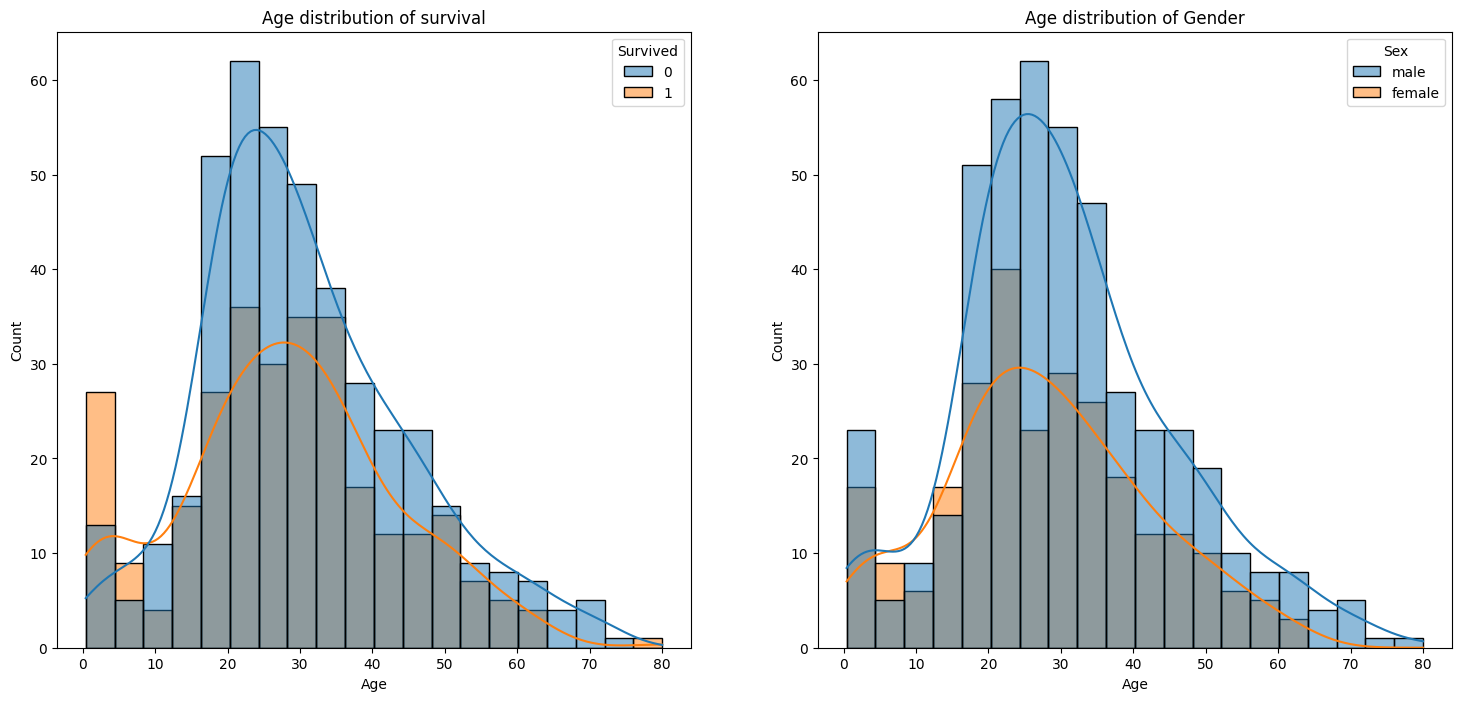

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.histplot(data = data, x = 'Age', hue = 'Survived', ax = ax[0], kde = True)
ax[0].set_title('Age distribution of survival')
sns.histplot(data = data, x = 'Age', hue = 'Sex', ax = ax[1], kde = True)
ax[1].set_title('Age distribution of Gender')
plt.show()

Dari data diatas, bisa kita lihat bahwa age memiliki faktor ang signifikan untuk chance of survival, dimana kategori master (anak - anak) memiliki persentase lebih baik.

### SibSp & Parch -> Family Related

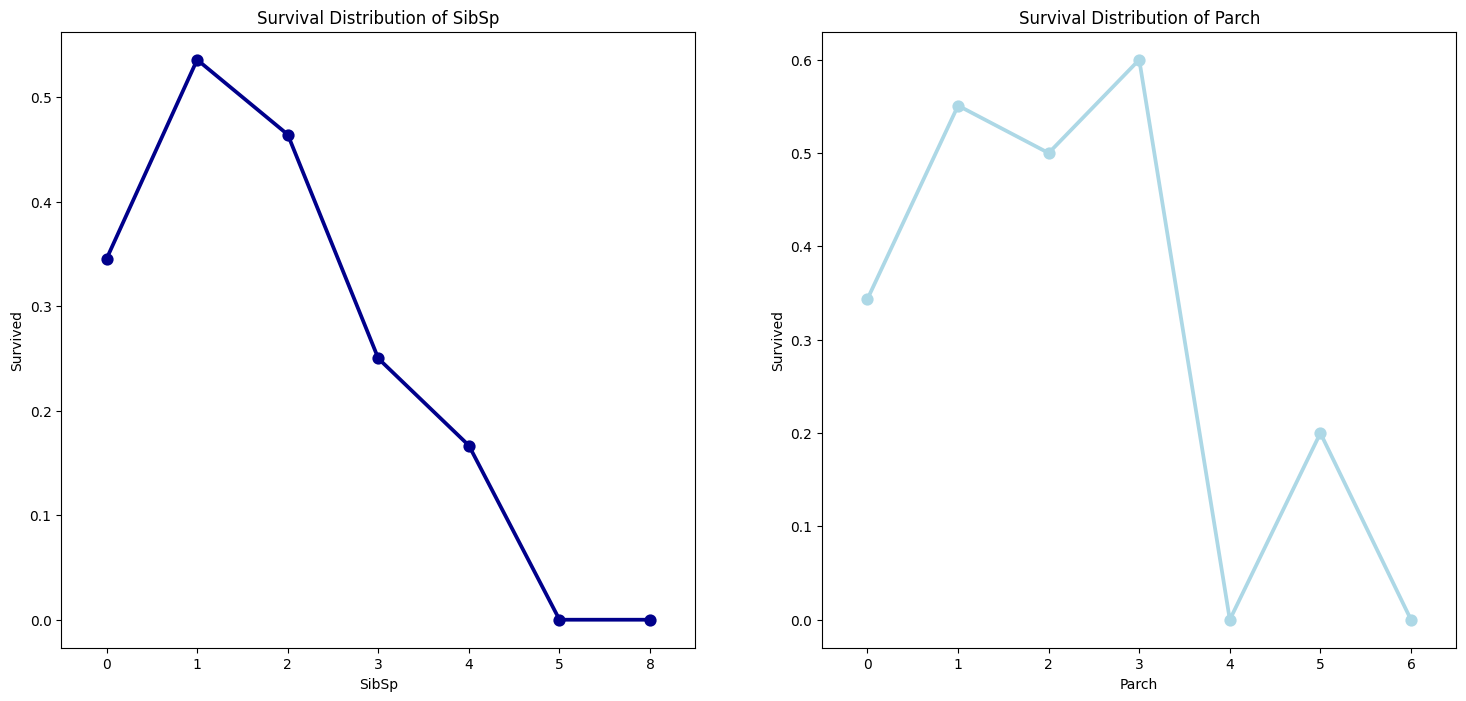

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.pointplot(data = data, x = 'SibSp', y = 'Survived', ci  = False, color = 'darkblue', ax =  ax[0])
ax[0].set_title('Survival Distribution of SibSp')
sns.pointplot(data = data, x = 'Parch', y = 'Survived', ci  = False, color = 'lightblue', ax =  ax[1])
ax[1].set_title('Survival Distribution of Parch')
plt.show()

Dari data ini, keduanya memiliki peran signifikan dalam menentukan survival seseorang, dimana semakin seseorang sedikit dengan anggota keluarganya, chance akan semakin tinggi diikuti dengan membawa sekitar 1 - 2 ketimbang 3+

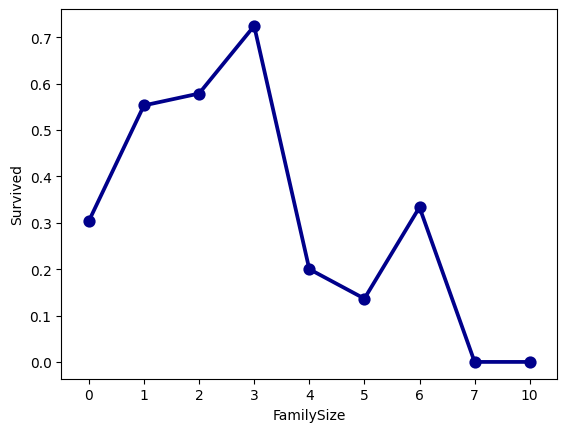

In [20]:
data['FamilySize'] = data['SibSp'] + data['Parch']
sns.pointplot(data = data, x = 'FamilySize', y = 'Survived', ci  = False, color = 'darkblue', )
ax[0].set_title('Chance of survival based on FamilySize')
plt.show()

### Fare

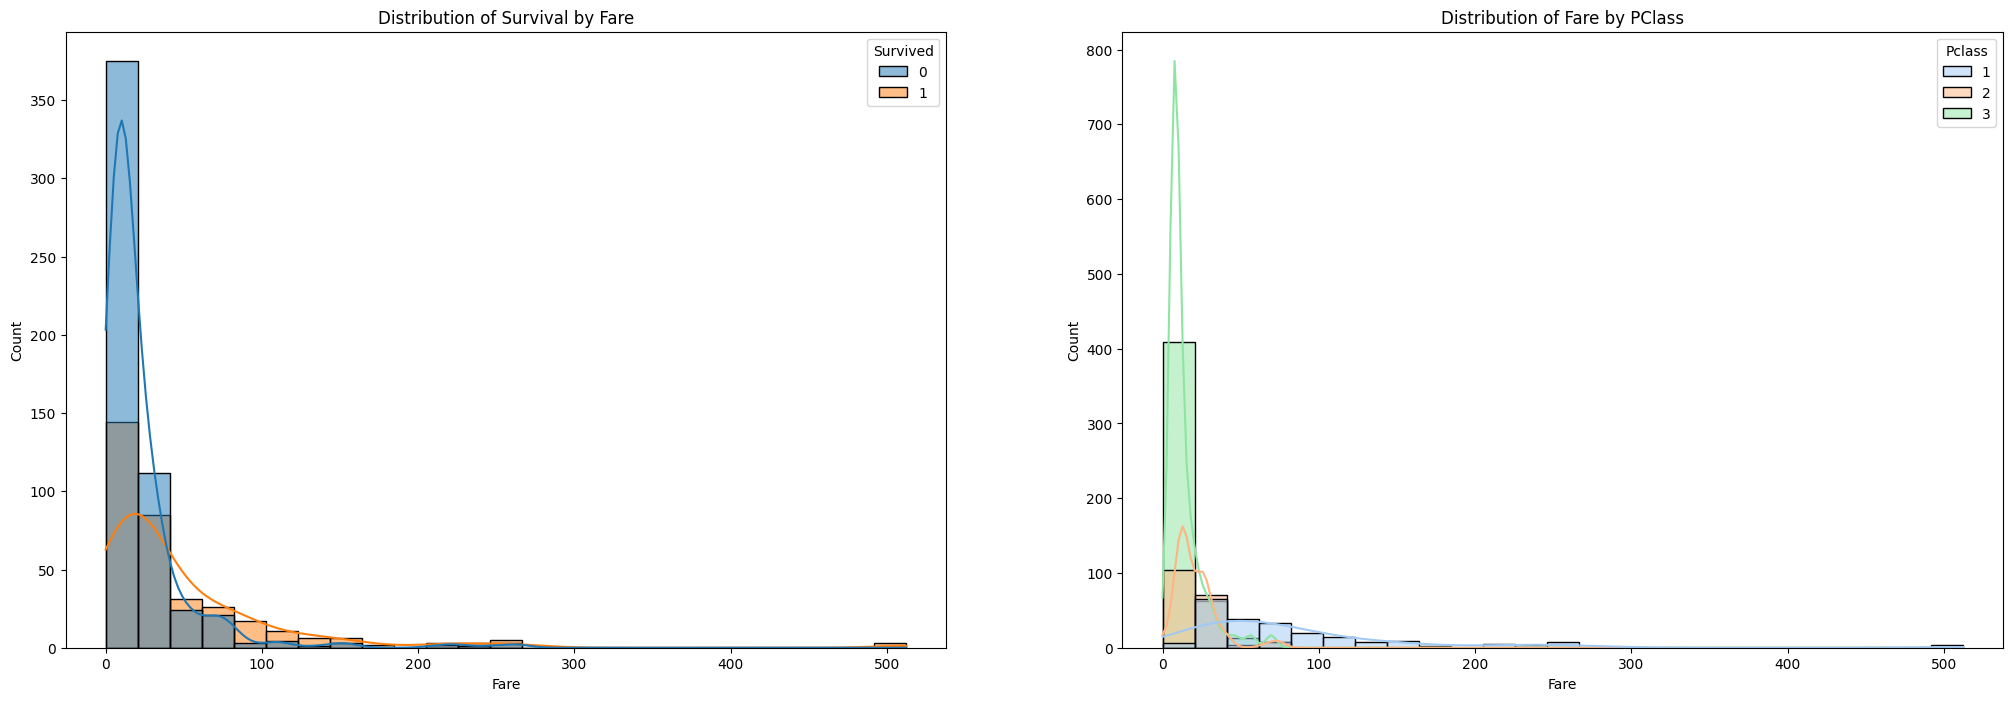

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (25, 8))
sns.histplot(data = data, x = 'Fare', hue = 'Survived', bins = 25, ax = ax[0], kde = True)
ax[0].set_title('Distribution of Survival by Fare')
sns.histplot(data = data, x = 'Fare', hue = 'Pclass', bins = 25, ax = ax[1], kde = True, palette='pastel', edgecolor = 'black')
ax[1].set_title('Distribution of Fare by PClass')
plt.show()

In [22]:
data['FareRange'] = pd.qcut(data['Fare'], 4)
data['Survived'].groupby(data['FareRange']).mean()

FareRange
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

In [23]:
data['Fare_cat'] = 0
data.drop(columns = ['FareRange'], inplace = True)
data.loc[data['Fare'] <= 7.91,'Fare_cat'] = 0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454), 'Fare_cat'] = 1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31), 'Fare_cat'] = 2
data.loc[(data['Fare']>31)&(data['Fare']<=513), 'Fare_cat'] = 3
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Initial,FamilySize,Fare_cat
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr,1,0
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs,1,3
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss,0,1
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs,1,3
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr,0,1


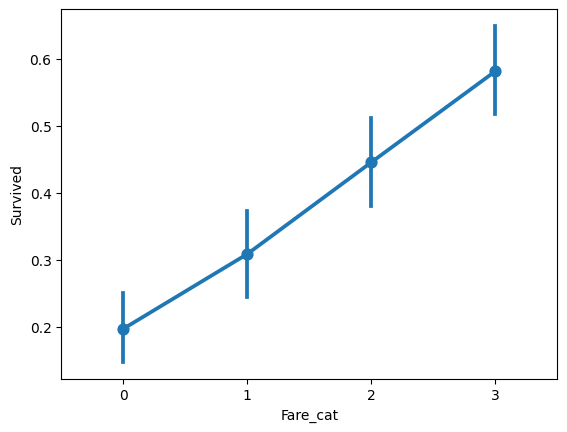

In [24]:
sns.pointplot(data = data, x = 'Fare_cat', y = 'Survived')
plt.show()

Dari sini kita bisa melihat, bahwa semakin tinggi sebuah fare, semakin banyak orang yang survive, dimana hal ini dimiliki oleh PClass `1

### Embarked

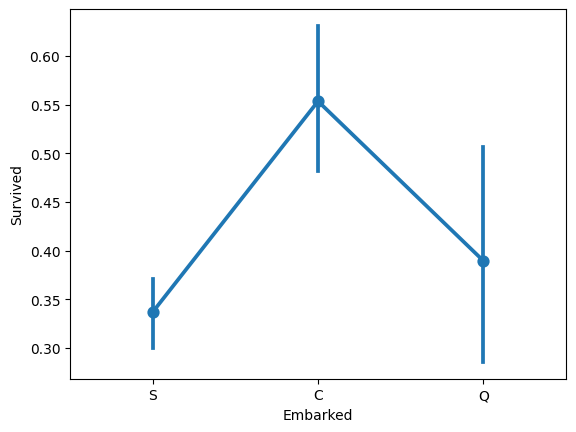

In [25]:
sns.pointplot(data = data, x = 'Embarked', y = 'Survived')
plt.show()

Dari sini kita bisa melihat bahwa Dari segi Embarked, C (Queenstown) memiliki chance paling tinggi dalam survival

## Correlation

<Axes: >

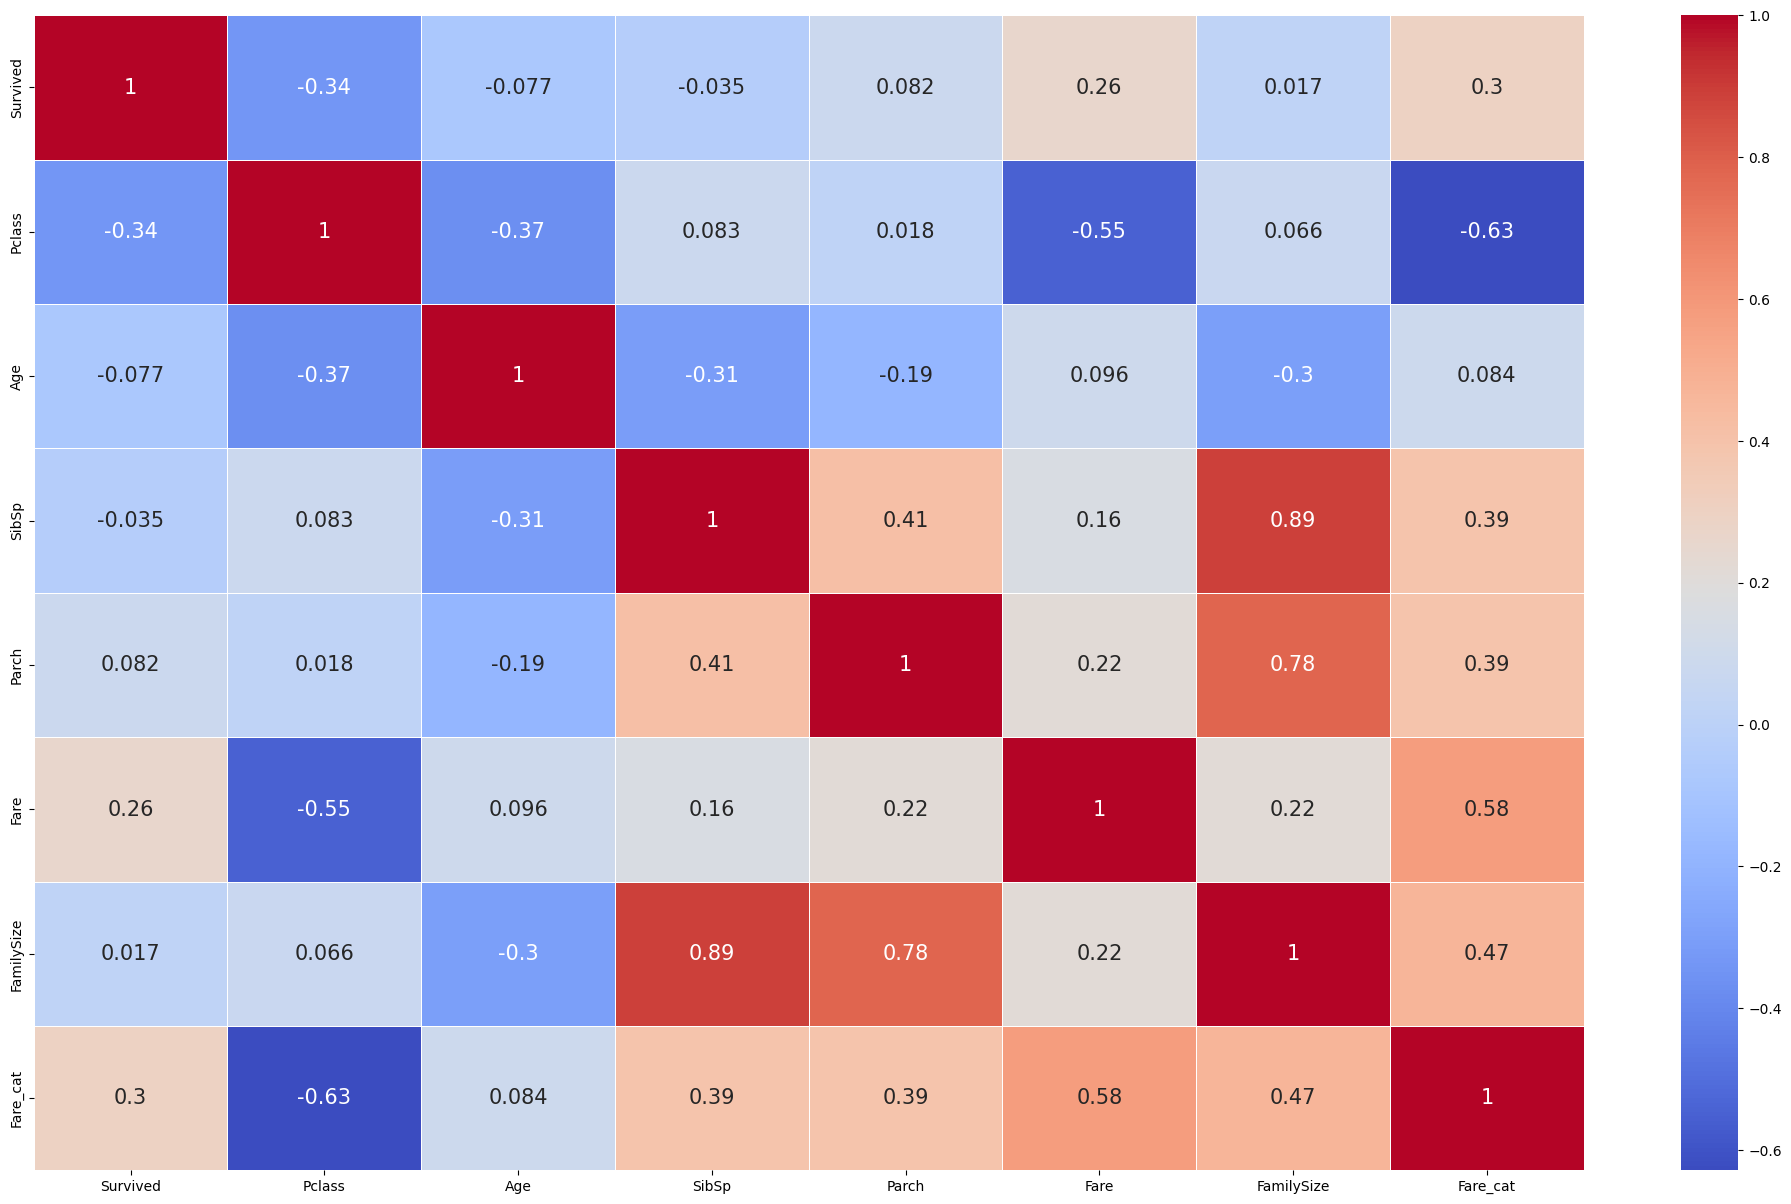

In [26]:
numerical = data.select_dtypes(include = 'number')
plt.figure(figsize=(25,15))
sns.heatmap(data =  numerical.corr(), annot = True, annot_kws={'size': 15}, cmap = 'coolwarm', linewidth = 0.4)

Karena FamilySize sudah mewakili Parch danSibSp, maka bisa kita drop kedua variable ini

<Axes: >

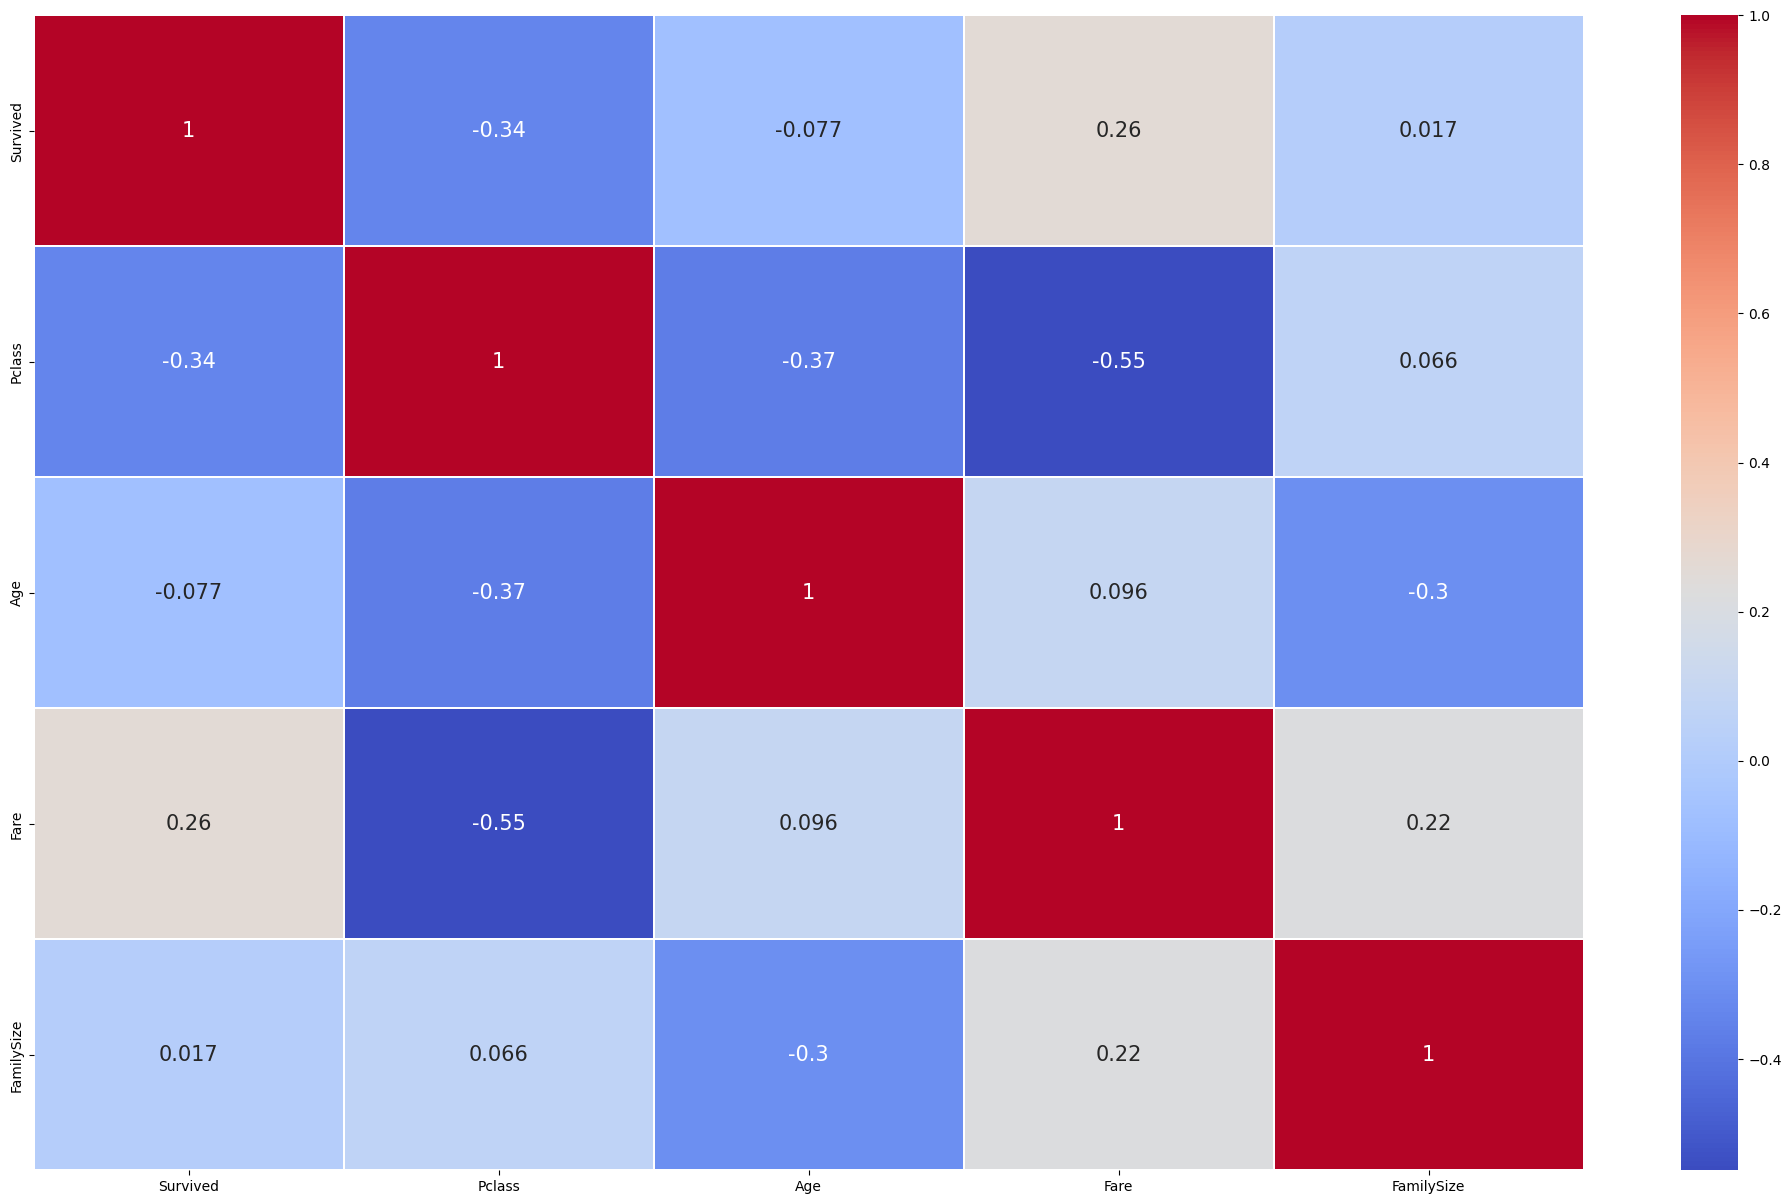

In [27]:
data.drop(columns = ['SibSp', 'Parch', 'Fare_cat'], inplace = True)
numerical = data.select_dtypes(include = 'number')
plt.figure(figsize=(25,15))
sns.heatmap(data =  numerical.corr(), annot = True, annot_kws={'size': 15}, cmap = 'coolwarm', linewidth = 0.2)

# Data Preprocessing

## Handling Null Variable

### Cabin

In [28]:
data.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
Fare            0
Cabin         687
Embarked        2
Initial         0
FamilySize      0
dtype: int64

Karena Cabin memiliki banyak sekali Null Variable, maka kita bisa saja drop variable ini

In [29]:
data.drop(columns = ['Cabin'], inplace = True)
data.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
Fare            0
Embarked        2
Initial         0
FamilySize      0
dtype: int64

### Age

Untuk menghandle Age, kita perlu menghandle dengan mean masing - masing initial

In [30]:
data['Age'].groupby(data['Initial']).mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [31]:
data.loc[(data['Initial']=='Master') & (data['Age'].isna()), 'Age'] = 4.57
data.loc[(data['Initial']=='Miss') & (data['Age'].isna()), 'Age'] = 21.86
data.loc[(data['Initial']=='Mr') & (data['Age'].isna()), 'Age'] = 32.73
data.loc[(data['Initial']=='Mrs') & (data['Age'].isna()), 'Age'] = 35.98
data.loc[(data['Initial']=='Other') & (data['Age'].isna()), 'Age'] = 45.88
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      2
Initial       0
FamilySize    0
dtype: int64

### Embarked

Untuk embarked kita bisa menggunakan Queenstown dengan memiliki tingkat survival paling tinggi

In [32]:
data['Embarked'].fillna('S', inplace = True)
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Initial       0
FamilySize    0
dtype: int64

## Encoding Variable

In [33]:
X = data.drop(columns=['Survived']).values
y = data['Survived'].values

In [34]:
data = pd.get_dummies(data, drop_first = True)
data.iloc[:, 4:] = data.iloc[:,4:].astype(int)
data

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S,Initial_Miss,Initial_Mr,Initial_Mrs,Initial_Other
0,0,3,22.00,7.2500,1,1,0,1,0,1,0,0
1,1,1,38.00,71.2833,1,0,0,0,0,0,1,0
2,1,3,26.00,7.9250,0,0,0,1,1,0,0,0
3,1,1,35.00,53.1000,1,0,0,1,0,0,1,0
4,0,3,35.00,8.0500,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.00,13.0000,0,1,0,1,0,0,0,1
887,1,1,19.00,30.0000,0,0,0,1,1,0,0,0
888,0,3,21.86,23.4500,3,0,0,1,1,0,0,0
889,1,1,26.00,30.0000,0,1,0,0,0,1,0,0


In [35]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

## Splitting Training and Test Dataset

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 0)

## Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:, [1, 2,3]] = sc.fit_transform(X_train.iloc[:, [1,2,3]])
X_test.iloc[:, [1, 2,3]] = sc.fit_transform(X_test.iloc[:, [1,2,3]])

# Modeling

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
def modeling(model):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(f'Model Accuracy Score: {accuracy_score(prediction, y_test)}')
    print(f'Model Precision Score: {precision_score(prediction, y_test)}')
    print(f'Model Recall Score: {recall_score(prediction, y_test)}')
    print(f'Model F1 Score: {f1_score(prediction, y_test)}')
    print(f'Absolute Error (MAE): ', mean_absolute_error(prediction, y_test))
    print(f'Root Mean Squarred Error (RMSE): ', np.sqrt(mean_squared_error(prediction, y_test)))
    score = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    print(f"Model Cross Validation Mean Score: {score.mean()}")
    print()
    cm = confusion_matrix(prediction, y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='summer_r')

### Linear Model

Model Accuracy Score: 0.8100558659217877
Model Precision Score: 0.7246376811594203
Model Recall Score: 0.7692307692307693
Model F1 Score: 0.746268656716418
Absolute Error (MAE):  0.18994413407821228
Root Mean Squarred Error (RMSE):  0.43582580703557733
Model Cross Validation Mean Score: 0.8315336463223788



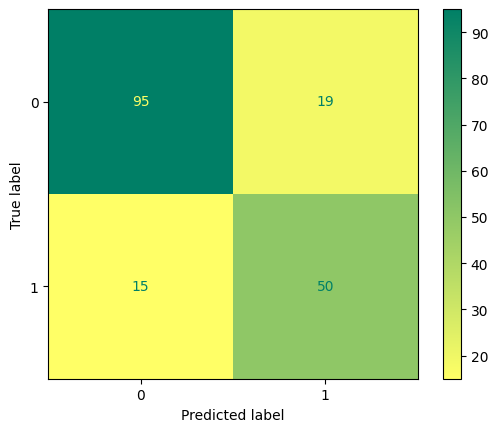

In [39]:
from sklearn.linear_model import LogisticRegression
linear = LogisticRegression()
modeling(linear)

### Svm Model

Model Accuracy Score: 0.8156424581005587
Model Precision Score: 0.7246376811594203
Model Recall Score: 0.78125
Model F1 Score: 0.7518796992481203
Absolute Error (MAE):  0.18435754189944134
Root Mean Squarred Error (RMSE):  0.42936877145344576
Model Cross Validation Mean Score: 0.8357589984350546



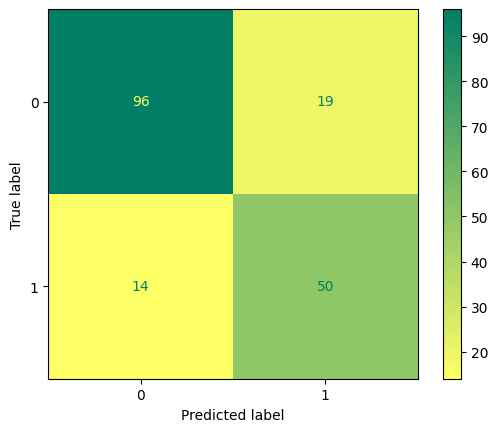

In [40]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf')
modeling(svm)

### KNN

Model Accuracy Score: 0.8156424581005587
Model Precision Score: 0.6231884057971014
Model Recall Score: 0.86
Model F1 Score: 0.7226890756302521
Absolute Error (MAE):  0.18435754189944134
Root Mean Squarred Error (RMSE):  0.42936877145344576
Model Cross Validation Mean Score: 0.8104264475743349



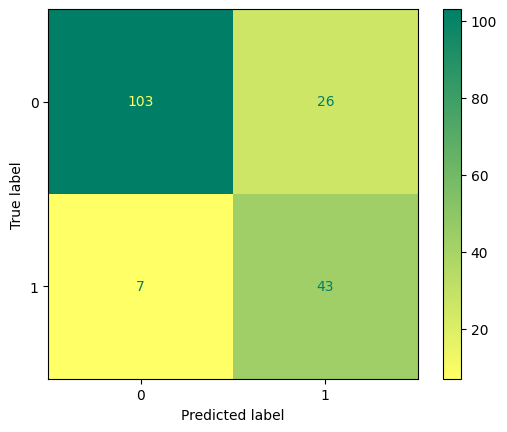

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
modeling(knn)

### Naive Bayes

Model Accuracy Score: 0.776536312849162
Model Precision Score: 0.6956521739130435
Model Recall Score: 0.7164179104477612
Model F1 Score: 0.7058823529411765
Absolute Error (MAE):  0.22346368715083798
Root Mean Squarred Error (RMSE):  0.47271945924706543
Model Cross Validation Mean Score: 0.7477895148669796



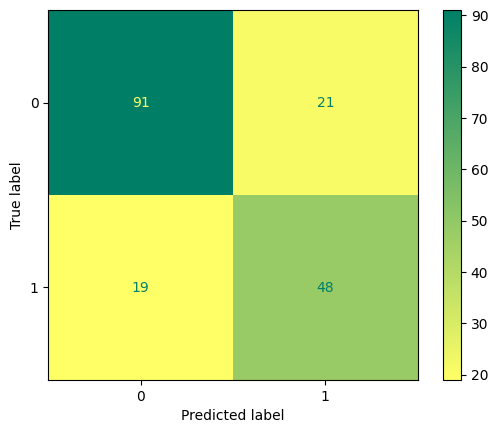

In [42]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
modeling(NB)

### Random Forest

Model Accuracy Score: 0.8491620111731844
Model Precision Score: 0.7246376811594203
Model Recall Score: 0.8620689655172413
Model F1 Score: 0.7874015748031497
Absolute Error (MAE):  0.15083798882681565
Root Mean Squarred Error (RMSE):  0.38837866680189276
Model Cross Validation Mean Score: 0.7950508607198749



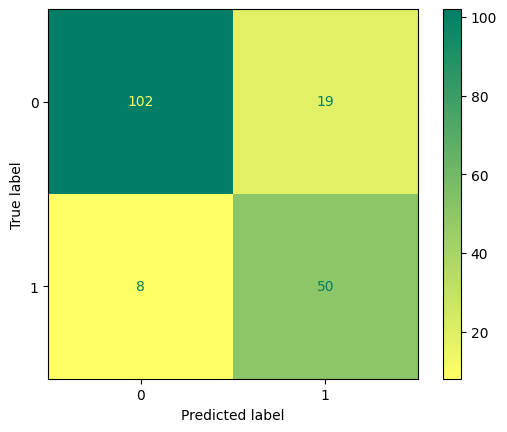

In [43]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=50)
modeling(forest)

### XGBOost

Model Accuracy Score: 0.8156424581005587
Model Precision Score: 0.7101449275362319
Model Recall Score: 0.7903225806451613
Model F1 Score: 0.7480916030534351
Absolute Error (MAE):  0.18435754189944134
Root Mean Squarred Error (RMSE):  0.42936877145344576
Model Cross Validation Mean Score: 0.8104460093896713



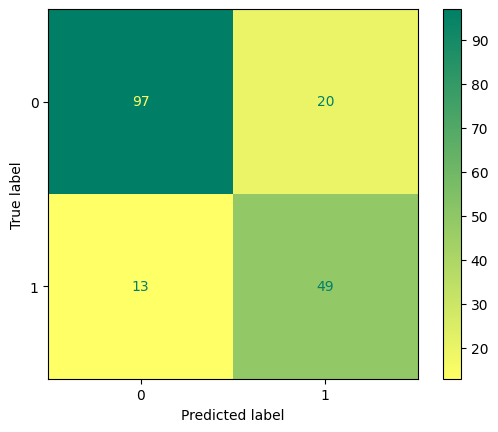

In [44]:
import xgboost as xgb
exgi = xgb.XGBClassifier()
modeling(exgi)